In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

In [3]:
# Carregar a base de dados CIFAR-10
(_, _), (x_test, y_test) = cifar10.load_data()


In [4]:
# Filtrar imagens de gatos (classe 3) e cachorros (classe 5)
cat_indices = (y_test == 3).flatten()
dog_indices = (y_test == 5).flatten()
indices = cat_indices | dog_indices
x_test_filtered = x_test[indices]
y_test_filtered = y_test[indices]

In [5]:
# Pré-processamento das imagens
x_test_preprocessed = x_test_filtered.astype('float32') / 255.0

In [6]:
# Convertendo os rótulos para o formato apropriado
y_test_filtered = np.where(y_test_filtered == 3, 0, 1)


In [7]:
# Construção da Rede Neural
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [8]:
# Compilação da Rede Neural
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
# Avaliação da Rede Neural
test_loss, test_accuracy = model.evaluate(x_test_preprocessed, y_test_filtered, verbose=2)
print(f'Test accuracy: {test_accuracy}')

63/63 - 4s - loss: 0.7357 - accuracy: 0.5000 - 4s/epoch - 70ms/step
Test accuracy: 0.5


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Função para exibir as imagens e previsões
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}', color='black' if true_labels[i] == predicted_labels[i] else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
# Realizar previsões na base de teste
predictions = model.predict(x_test_preprocessed)
predicted_labels = np.argmax(predictions, axis=1)


63/63 [==============================] - 2s 29ms/step


In [13]:
# Selecionar algumas imagens para exibição
num_images = 25
random_indices = np.random.choice(len(x_test_preprocessed), num_images, replace=False)
sample_images = x_test_filtered[random_indices]
true_labels = y_test_filtered[random_indices]
predicted_labels = predicted_labels[random_indices]


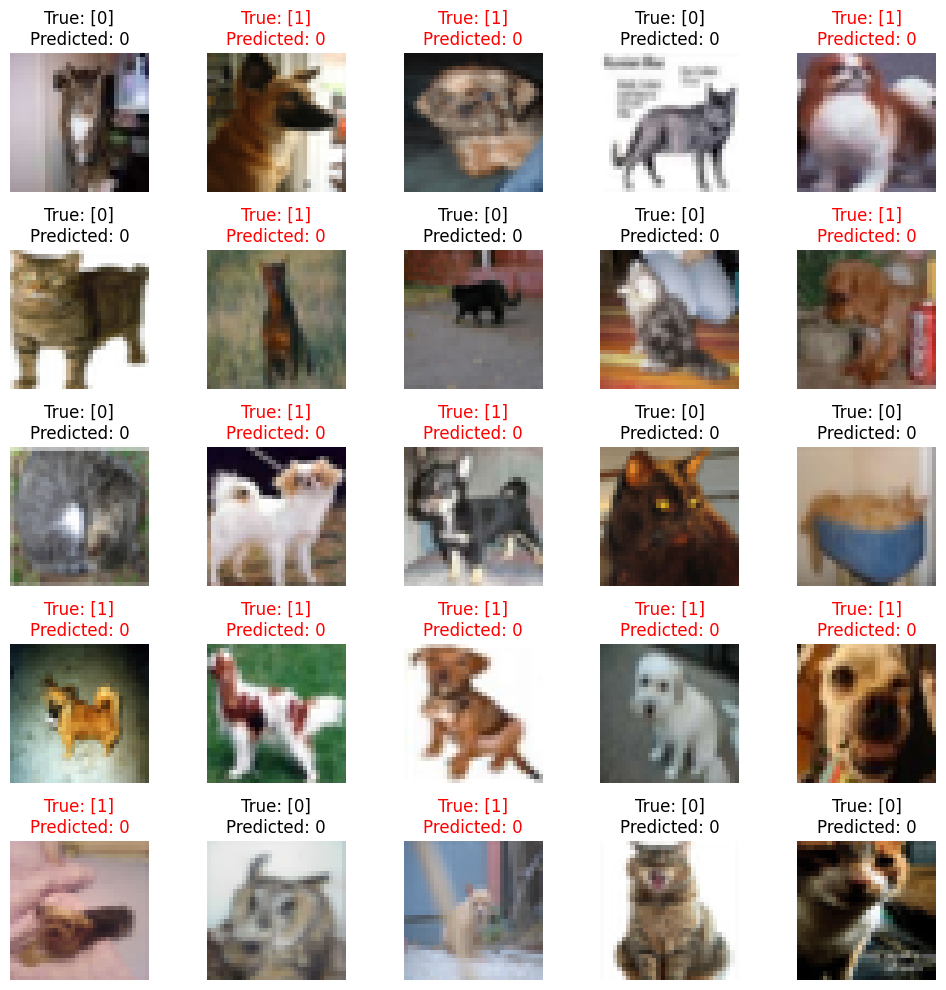

In [14]:
# Exibir as imagens com previsões
plot_images(sample_images, true_labels, predicted_labels)

Este código realiza a avaliação da rede neural treinada para classificar imagens de gatos e cachorros e exibe algumas imagens de teste com suas previsões correspondentes. O meu objetivo é visualizar como a rede neural está se saindo na classificação dessas imagens.